<a href="https://colab.research.google.com/github/Seeeeiu/Python/blob/master/1D__GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gaussian Mixture Model - GMM

In [0]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

### 1.  Generate some data samples from a 1D GMM with two Gaussian Components

In [0]:
data=np.zeros((100,))
for n in range(0, 100):
    #randomly select a Gaussian component (c0, c1) with prob of 0.5
    r= int(np.random.rand() > 0.5)  # randn ~ uniform random distribution
    if r == 0:
       # randomly draw a sample from the Gaussian component (mean = 2, std=1)
       sample =  2 + np.random.randn() 
    else:
       # randomly draw a sample from the Gaussian component (mean = 6, std=1)
       sample =  6 + np.random.randn() 
    data[n]=sample

In [0]:
data

array([6.48582306, 8.3538096 , 5.0196677 , 7.03455282, 1.20834542,
       6.75217284, 7.22935099, 6.07989703, 5.83216559, 5.91052758,
       5.52974331, 0.99605408, 6.92255628, 2.5678813 , 6.39776502,
       1.66749703, 7.60483658, 6.8819514 , 2.99835044, 1.97994385,
       6.50691123, 1.53879992, 0.4954212 , 1.77338787, 6.16967698,
       5.25704373, 6.1491708 , 6.88532047, 5.1465125 , 1.82720989,
       5.51402778, 7.90445705, 5.56255087, 5.19695749, 2.61470797,
       1.40257515, 1.66626433, 0.31784327, 6.15787563, 2.98165079,
       0.25882855, 0.34638191, 6.49378223, 3.24291636, 5.76482732,
       3.29476069, 2.22512503, 5.66058249, 2.71727169, 1.16529991,
       2.34150024, 2.71909338, 0.74607716, 5.09332459, 6.87987201,
       2.74240996, 3.40431703, 2.94548086, 1.92408227, 4.09481785,
       1.53989782, 6.12964929, 2.14899344, 1.02740304, 5.82756722,
       5.83254393, 5.32934671, 5.86613043, 5.14114413, 5.56822705,
       1.38042061, 1.99283497, 5.71403611, 3.64332515, 6.37259

visualize the 1D data by using 1D histogram 

(array([ 7., 14., 11., 11.,  3.,  4., 25., 12., 10.,  3.]),
 array([0.25882855, 1.06832666, 1.87782476, 2.68732287, 3.49682097,
        4.30631908, 5.11581718, 5.92531529, 6.73481339, 7.5443115 ,
        8.3538096 ]),
 <a list of 10 Patch objects>)

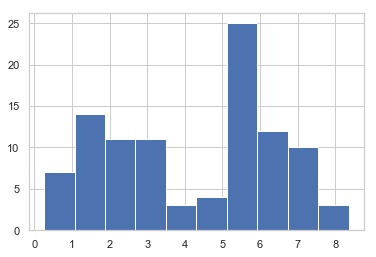

In [0]:
fig, ax = plt.subplots()
ax.hist(data, bins=10)

another way to construct a 1D histogram and visualize it

In [0]:
hist, bin_edges = np.histogram(data, bins=10)

In [0]:
hist

array([ 7, 14, 11, 11,  3,  4, 25, 12, 10,  3], dtype=int64)

In [0]:
bin_edges

array([0.25882855, 1.06832666, 1.87782476, 2.68732287, 3.49682097,
       4.30631908, 5.11581718, 5.92531529, 6.73481339, 7.5443115 ,
       8.3538096 ])

<BarContainer object of 10 artists>

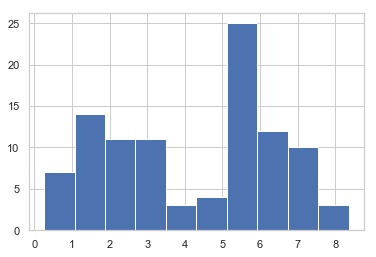

In [0]:
bar_location = (bin_edges[1:]+bin_edges[0:-1])/2
bar_width = bin_edges[1:]-bin_edges[0:-1]
bar_height=hist
fig, ax = plt.subplots()
ax.bar(bar_location, bar_height, bar_width)

In [0]:
bin_edges

array([0.25882855, 1.06832666, 1.87782476, 2.68732287, 3.49682097,
       4.30631908, 5.11581718, 5.92531529, 6.73481339, 7.5443115 ,
       8.3538096 ])

In [0]:
bin_edges[0:-1]

array([0.25882855, 1.06832666, 1.87782476, 2.68732287, 3.49682097,
       4.30631908, 5.11581718, 5.92531529, 6.73481339, 7.5443115 ])

In [0]:
bin_edges[0:-2:1]

array([0.25882855, 1.06832666, 1.87782476, 2.68732287, 3.49682097,
       4.30631908, 5.11581718, 5.92531529, 6.73481339])

### 2. Estimate/Recover the Parameters of the 1D GMM from  the Data Samples

### Let's pretend that we do not know the source of the `data`. 
### We 'guess' that the data samples are from a 1D GMM with two Gaussian components.
### The task is to estimate the parameters of the 1D GMM

In [0]:
from sklearn.mixture import GaussianMixture
GMM=GaussianMixture(2)
#GMM.fit(data) # fit the GMM model to data -> estimate the parameters 
GMM.fit(data.reshape(-1,1)) 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
GMM.weights_

array([0.44972881, 0.55027119])

In [0]:
GMM.means_

array([[1.99934499],
       [6.01017814]])

In [0]:
GMM.covariances_

array([[[0.83772963]],

       [[0.7182618 ]]])

In [0]:
score=GMM.score_samples(np.linspace(0, 10, 1000).reshape(1000,1))
pdf = np.exp(score) # pdf of the GMM

Text(0.5, 1.0, 'GMM pdf')

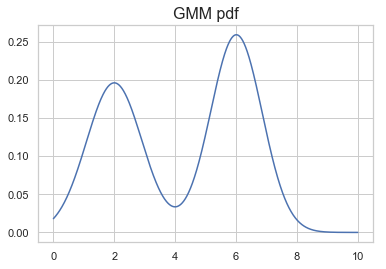

In [0]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.set_title('GMM pdf', fontsize=16)

plot the PDF of the first Gaussian component

Text(0.5, 1.0, 'GMM pdf')

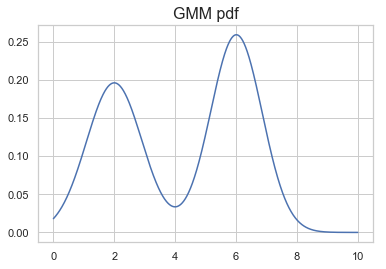

In [0]:
score=GMM.score_samples(np.linspace(0, 10, 1000).reshape(1000,1))
pdf = np.exp(score) # pdf of the GMM

fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.set_title('GMM pdf', fontsize=16)

Then, we do clustering: divide the data into two clusters corresponding to the two Gaussian components 

In [0]:
label=GMM.predict(data.reshape(-1,1))
label

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

Text(0.5, 1.0, 'clustering result')

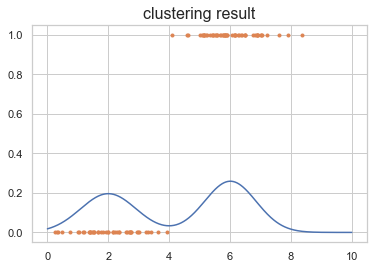

In [0]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 10, 1000), pdf)
ax.plot(data, label, '.')
ax.set_title('clustering result', fontsize=16)

Text(0.5, 1.0, 'clustering result on new_data')

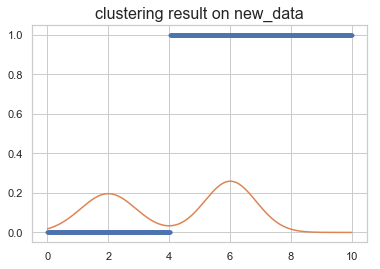

In [0]:
new_data = np.linspace(0, 10, 1000).reshape(1000,1)
new_label = GMM.predict(new_data)
new_score = GMM.score_samples(new_data)
pdf_value = np.exp(new_score) # pdf of the GMM

fig, ax = plt.subplots()
ax.plot(new_data, new_label, '.')
ax.plot(new_data, pdf_value)
ax.set_title('clustering result on new_data', fontsize=16)

In [0]:
new_data

array([[ 0.        ],
       [ 0.01001001],
       [ 0.02002002],
       [ 0.03003003],
       [ 0.04004004],
       [ 0.05005005],
       [ 0.06006006],
       [ 0.07007007],
       [ 0.08008008],
       [ 0.09009009],
       [ 0.1001001 ],
       [ 0.11011011],
       [ 0.12012012],
       [ 0.13013013],
       [ 0.14014014],
       [ 0.15015015],
       [ 0.16016016],
       [ 0.17017017],
       [ 0.18018018],
       [ 0.19019019],
       [ 0.2002002 ],
       [ 0.21021021],
       [ 0.22022022],
       [ 0.23023023],
       [ 0.24024024],
       [ 0.25025025],
       [ 0.26026026],
       [ 0.27027027],
       [ 0.28028028],
       [ 0.29029029],
       [ 0.3003003 ],
       [ 0.31031031],
       [ 0.32032032],
       [ 0.33033033],
       [ 0.34034034],
       [ 0.35035035],
       [ 0.36036036],
       [ 0.37037037],
       [ 0.38038038],
       [ 0.39039039],
       [ 0.4004004 ],
       [ 0.41041041],
       [ 0.42042042],
       [ 0.43043043],
       [ 0.44044044],
       [ 0